In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('water.csv')
df.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  61 non-null     int64 
 1   location    61 non-null     object
 2   town        61 non-null     object
 3   mortality   61 non-null     int64 
 4   hardness    61 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.5+ KB


In [24]:
df.describe()

,Unnamed: 0,mortality,hardness
count,61.000000,61.000000,61.000000
mean,31.000000,1524.147541,47.180328
std,17.752934,187.668754,38.093966
min,1.000000,1096.000000,5.000000
25%,16.000000,1379.000000,14.000000
50%,31.000000,1555.000000,39.000000
75%,46.000000,1668.000000,75.000000
max,61.000000,1987.000000,138.000000


In [25]:
df['mortality'].mode()[0]

1486

In [26]:
df['hardness'].mode()[0]

14

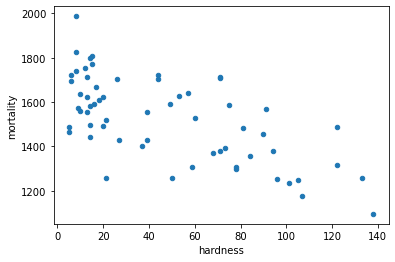

In [27]:
df.plot(kind='scatter', x='hardness', y='mortality')

Проверим наличие выбросов

In [28]:
q1 = df['hardness'].quantile(0.25)
q3 = df['hardness'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr) 
upper_bound = q3 + (1.5 * iqr)
remove_outliers = df[df['hardness'].between(lower_bound, upper_bound, inclusive=True)]
remove_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  61 non-null     int64 
 1   location    61 non-null     object
 2   town        61 non-null     object
 3   mortality   61 non-null     int64 
 4   hardness    61 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.9+ KB


In [29]:
q1 = df['mortality'].quantile(0.25)
q3 = df['mortality'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr) 
upper_bound = q3 + (1.5 * iqr)
remove_outliers = df[df['mortality'].between(lower_bound, upper_bound, inclusive=True)]
remove_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  61 non-null     int64 
 1   location    61 non-null     object
 2   town        61 non-null     object
 3   mortality   61 non-null     int64 
 4   hardness    61 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.9+ KB


Выбросов нет.

### Корреляция

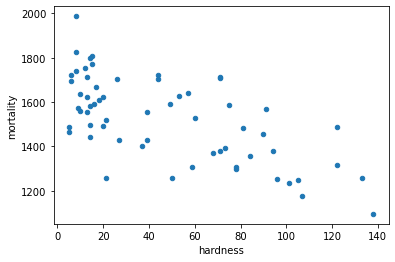

In [7]:
df.plot(kind='scatter', x='hardness', y='mortality')

In [9]:
df[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [10]:
df[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [11]:
df[['hardness', 'mortality']].corr(method='kendall')

,hardness,mortality
hardness,1.000000,-0.453753
mortality,-0.453753,1.000000


По графику и по коэффициентам корреляции можно сделать вывод, что между смертностью и жесткостью воды довольно сильная обратная линейная зависимость.

### Регрессия

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [14]:
X = df[['hardness']]
y = df['mortality']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [16]:
X_train.shape

(42, 1)

In [17]:
y_train.shape

(42,)

In [18]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [19]:
model.coef_

array([-3.13167087])

In [20]:
model.intercept_

1668.9722977277095

mortality = -3.13167087 * hardness + 1668.9722977277095

In [21]:
y_pred = model.predict(X_test)
y_pred

array([1340.14685615, 1637.65558901, 1625.12890552, 1531.17877935,
       1424.7019697 , 1606.33888028, 1252.46007173, 1434.09698232,
       1603.20720941, 1650.18227249, 1484.20371627, 1415.30695708,
       1546.83713371, 1625.12890552, 1446.62366581, 1546.83713371,
       1637.65558901, 1621.99723465, 1352.67353964])

In [22]:
model.score(X_test, y_test)

0.5046490611017092

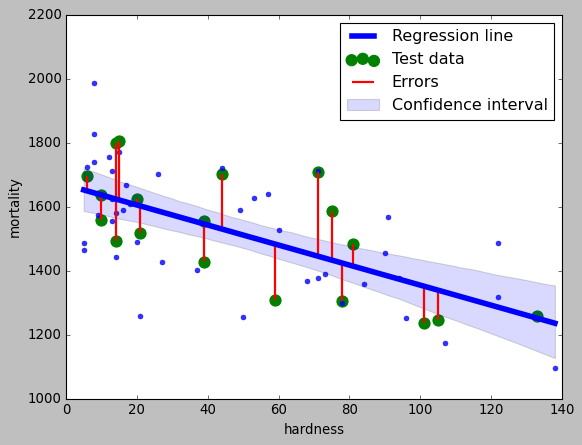

In [103]:
plt.style.use('classic')

plt.scatter(X_test, y_test, color='green',s=100,label='Test data')
plt.vlines(x=X_test, ymin=y_pred, ymax=y_test,color='red',linewidth=2,label='Errors')
ax=sns.regplot(X_train,y_train, line_kws={'label': 'Regression line','linewidth':5})
ax.collections[3].set_label('Confidence interval')
ax.legend()


Коэффициент детерминации показывает, что построенная модель лучше модели по средней

Text(0.5, 1.0, 'График остаточной ошибки')

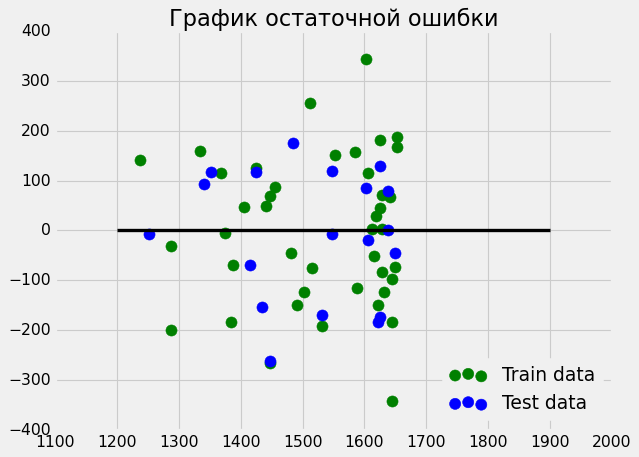

In [101]:
plt.style.use('fivethirtyeight')
plt.scatter(model.predict(X_train),model.predict(X_train)-y_train,color='green',s=100, label='Train data')
plt.scatter(y_pred,y_pred-y_test,color='blue',s=100, label='Test data')
plt.hlines(y=0, xmin=1200, xmax=1900,linewidth=3)
plt.legend(loc='lower right')
plt.title('График остаточной ошибки')

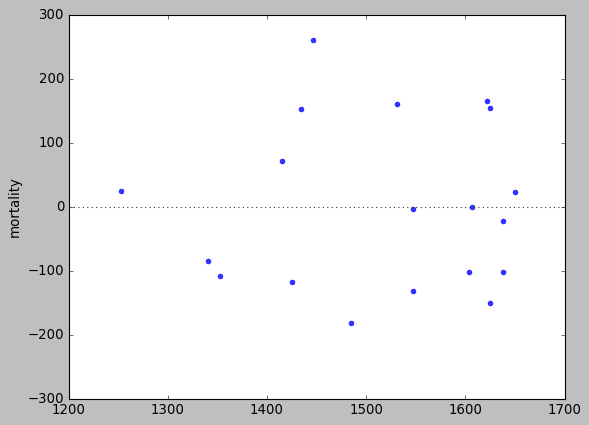

In [106]:
sns.residplot(y_pred,y_test)

Остатки ведут себя хаотично, поэтому модель линейной регрессии применима.

### Проанализируем северные регионы.

In [141]:
df1 = df.loc[df['location'] == 'North']
df1.head()

,Unnamed: 0,location,town,mortality,hardness
1,2,North,Birkenhead,1668,17
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
5,6,North,Bolton,1558,10
6,7,North,Bootle,1807,15


In [142]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 1 to 60
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  35 non-null     int64 
 1   location    35 non-null     object
 2   town        35 non-null     object
 3   mortality   35 non-null     int64 
 4   hardness    35 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.6+ KB


In [143]:
df1.describe()

,Unnamed: 0,mortality,hardness
count,35.000000,35.000000,35.000000
mean,30.742857,1633.600000,30.400000
std,17.254740,136.936911,26.134494
min,2.000000,1378.000000,6.000000
25%,17.500000,1557.500000,12.500000
50%,30.000000,1637.000000,17.000000
75%,45.500000,1718.000000,44.000000
max,61.000000,1987.000000,94.000000


In [144]:
df1['mortality'].mode()[0]

1591

In [145]:
df1['hardness'].mode()[0]

8

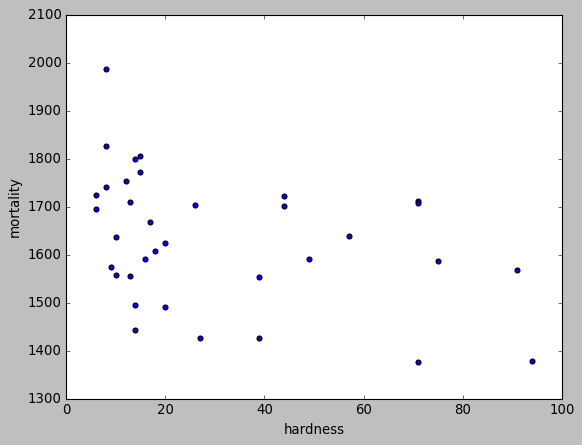

In [146]:
df1.plot(kind='scatter', x='hardness', y='mortality')

Проверим наличие выбросов

In [147]:
q1 = df1['hardness'].quantile(0.25)
q3 = df1['hardness'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr) 
upper_bound = q3 + (1.5 * iqr)
remove_outliers = df1[df1['hardness'].between(lower_bound, upper_bound, inclusive=True)]
remove_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 1 to 60
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  34 non-null     int64 
 1   location    34 non-null     object
 2   town        34 non-null     object
 3   mortality   34 non-null     int64 
 4   hardness    34 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.6+ KB


In [148]:
frame = pd.concat([df1, remove_outliers]).drop_duplicates(keep=False)

frame[frame['hardness'].notnull()]


,Unnamed: 0,location,town,mortality,hardness
21,22,North,Grimsby,1379,94


In [149]:
print(remove_outliers.hardness.mean())
print(remove_outliers.hardness.median())

28.529411764705884
16.5


In [150]:
print(df1.hardness.mean() - remove_outliers.hardness.mean())

1.8705882352941146


In [151]:
print(df1.hardness.median() - remove_outliers.hardness.median())

0.5


Выброс можно оставить, т.к. он несущественно искажает базовые статистики

In [152]:
q1 = df1['mortality'].quantile(0.25)
q3 = df1['mortality'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr) 
upper_bound = q3 + (1.5 * iqr)
remove_outliers = df1[df1['mortality'].between(lower_bound, upper_bound, inclusive=True)]
remove_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 1 to 60
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  34 non-null     int64 
 1   location    34 non-null     object
 2   town        34 non-null     object
 3   mortality   34 non-null     int64 
 4   hardness    34 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.6+ KB


In [153]:
frame = pd.concat([df1, remove_outliers]).drop_duplicates(keep=False)

frame[frame['mortality'].notnull()]

,Unnamed: 0,location,town,mortality,hardness
45,46,North,Salford,1987,8


In [154]:
print(remove_outliers.mortality.mean())
print(remove_outliers.mortality.median())

1623.2058823529412
1631.0


In [155]:
print(df1.mortality.mean() - remove_outliers.mortality.mean())

10.394117647058692


In [156]:
print(df1.mortality.median() - remove_outliers.mortality.median())

6.0


Выброс можно оставить, т.к. он несущественно искажает базовые статистики

### Корреляция

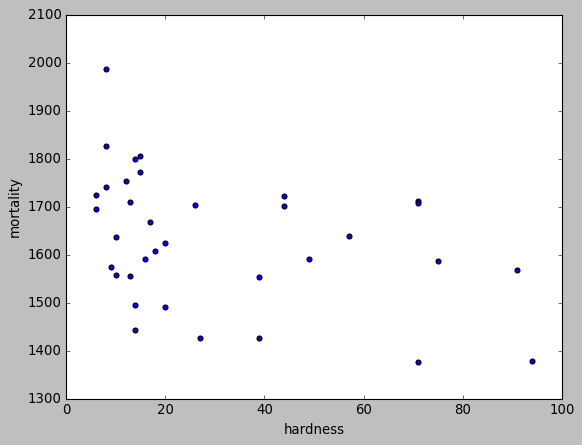

In [157]:
df1.plot(kind='scatter', x='hardness', y='mortality')

In [159]:
df1[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


In [160]:
df1[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


In [162]:
df1[['hardness', 'mortality']].corr(method='kendall')

,hardness,mortality
hardness,1.000000,-0.283058
mortality,-0.283058,1.000000


По графику и по коэффициентам корреляции можно сделать вывод, что между смертностью и жесткостью воды довольно несильная обратная зависимость. Возможно, зависимость нелинейна, т.к. коэффициент Пирсона дал результат по модулю меньше, чем коэффициент Спирмена.

### Регрессия

In [163]:
X = df1[['hardness']]
y = df1['mortality']

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [165]:
X_train.shape

(24, 1)

In [166]:
y_train.shape

(24,)

In [167]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [168]:
model.coef_

array([-1.97686226])

In [170]:
model.intercept_

1688.150229031281

mortality = -1.97686226 * hardness + 1688.150229031281

In [171]:
y_pred = model.predict(X_test)
y_pred

array([1672.33533095, 1670.35846869, 1660.47415739, 1676.28905547,
       1656.52043287, 1547.79300857, 1601.16828959, 1672.33533095,
       1611.05260089, 1658.49729513, 1611.05260089])

In [172]:
model.score(X_test, y_test)

0.018885304285745863

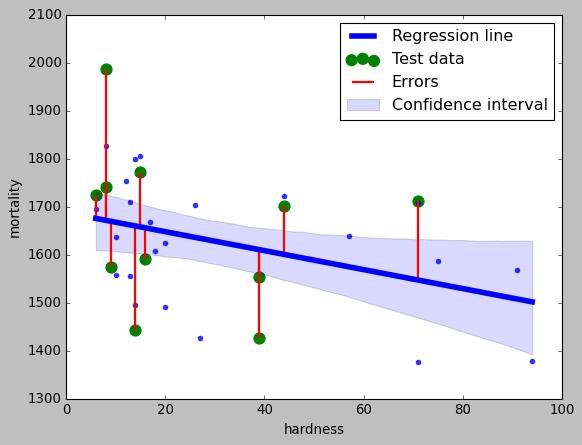

In [173]:
plt.style.use('classic')

plt.scatter(X_test, y_test, color='green',s=100,label='Test data')
plt.vlines(x=X_test, ymin=y_pred, ymax=y_test,color='red',linewidth=2,label='Errors')
ax=sns.regplot(X_train,y_train, line_kws={'label': 'Regression line','linewidth':5})
ax.collections[3].set_label('Confidence interval')
ax.legend()

Коэффициент детерминации показывает, что построенная модель почти не лучше модели по средней

Text(0.5, 1.0, 'График остаточной ошибки')

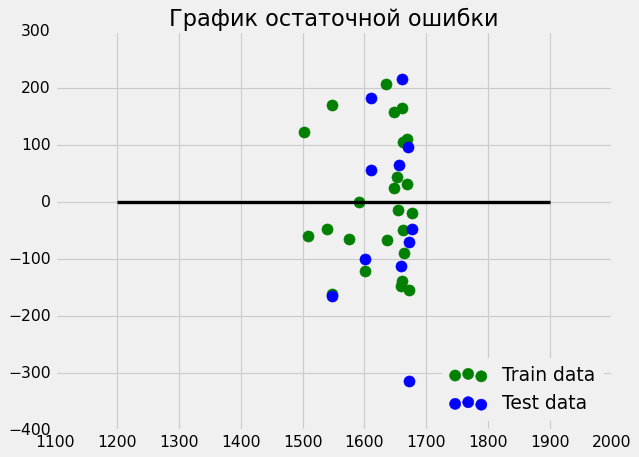

In [174]:
plt.style.use('fivethirtyeight')
plt.scatter(model.predict(X_train),model.predict(X_train)-y_train,color='green',s=100, label='Train data')
plt.scatter(y_pred,y_pred-y_test,color='blue',s=100, label='Test data')
plt.hlines(y=0, xmin=1200, xmax=1900,linewidth=3)
plt.legend(loc='lower right')
plt.title('График остаточной ошибки')

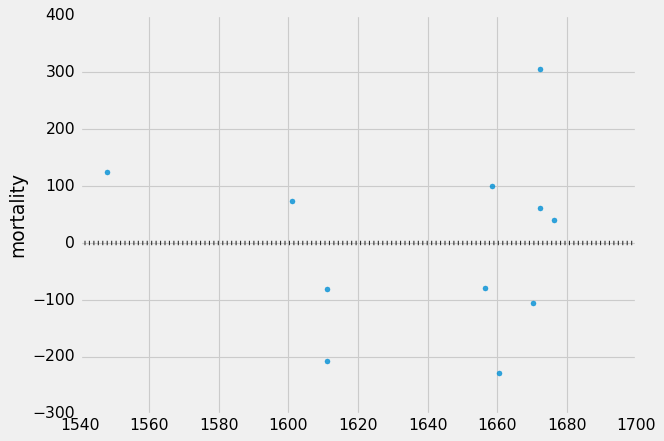

In [175]:
sns.residplot(y_pred,y_test)

График остатков напоминает косинусоиду, поэтому модель линейной регрессии неприменима, существует несильная обратная нелинейная зависимость.

### Проанализируем южные регионы.

In [206]:
df2 = df.loc[df['location'] == 'South']
df2.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
2,3,South,Birmingham,1466,5
7,8,South,Bournemouth,1299,78
9,10,South,Brighton,1359,84
10,11,South,Bristol,1392,73


In [207]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 0 to 59
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  26 non-null     int64 
 1   location    26 non-null     object
 2   town        26 non-null     object
 3   mortality   26 non-null     int64 
 4   hardness    26 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.2+ KB


In [208]:
df2.describe()

,Unnamed: 0,mortality,hardness
count,26.000000,26.000000,26.000000
mean,31.346154,1376.807692,69.769231
std,18.742342,140.269175,40.360682
min,1.000000,1096.000000,5.000000
25%,14.250000,1259.250000,40.250000
50%,33.500000,1364.000000,75.500000
75%,46.500000,1485.750000,99.750000
max,60.000000,1627.000000,138.000000


In [209]:
df2['mortality'].mode()[0]

1486

In [210]:
df2['hardness'].mode()[0]

5

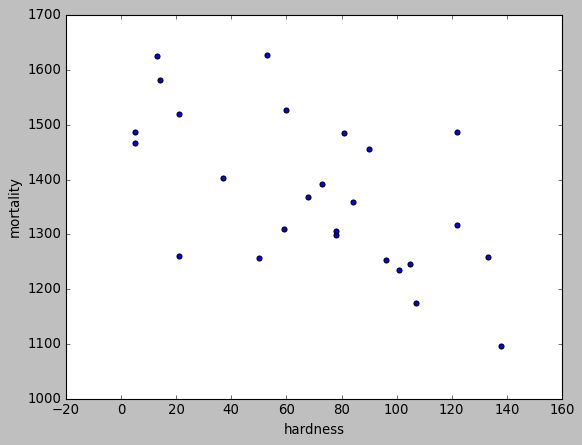

In [211]:
plt.style.use('classic')
df2.plot(kind='scatter', x='hardness', y='mortality')

Проверим наличие выбросов

In [212]:
q1 = df2['hardness'].quantile(0.25)
q3 = df2['hardness'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr) 
upper_bound = q3 + (1.5 * iqr)
remove_outliers = df2[df2['hardness'].between(lower_bound, upper_bound, inclusive=True)]
remove_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 0 to 59
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  26 non-null     int64 
 1   location    26 non-null     object
 2   town        26 non-null     object
 3   mortality   26 non-null     int64 
 4   hardness    26 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.2+ KB


In [213]:
q1 = df2['mortality'].quantile(0.25)
q3 = df2['mortality'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr) 
upper_bound = q3 + (1.5 * iqr)
remove_outliers = df2[df2['mortality'].between(lower_bound, upper_bound, inclusive=True)]
remove_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 0 to 59
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  26 non-null     int64 
 1   location    26 non-null     object
 2   town        26 non-null     object
 3   mortality   26 non-null     int64 
 4   hardness    26 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.2+ KB


Выбросов нет.

### Корреляция

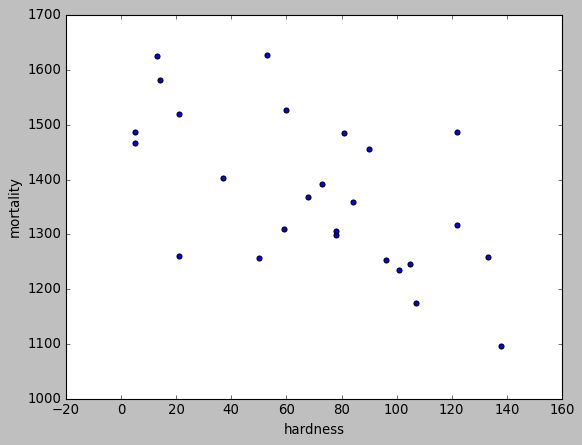

In [214]:
df2.plot(kind='scatter', x='hardness', y='mortality')

In [215]:
df2[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [216]:
df2[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


In [217]:
df2[['hardness', 'mortality']].corr(method='kendall')

,hardness,mortality
hardness,1.000000,-0.440315
mortality,-0.440315,1.000000


По графику и по коэффициентам корреляции можно сделать вывод, что между смертностью и жесткостью воды довольно сильная обратная линейная зависимость.

### Регрессия

In [218]:
X = df2[['hardness']]
y = df2['mortality']

In [219]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [220]:
X_train.shape

(18, 1)

In [221]:
y_train.shape

(18,)

In [222]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [223]:
model.coef_

array([-3.51342921])

In [224]:
model.intercept_

1640.2204603423374

mortality = -3.51342921 * hardness + 1640.2204603423374

In [225]:
y_pred = model.predict(X_test)
y_pred

array([1211.58209643, 1622.65331428, 1271.31039304, 1211.58209643,
       1510.22357948, 1566.43844688, 1432.92813681, 1622.65331428])

In [226]:
model.score(X_test, y_test)

-2.5519223012352077

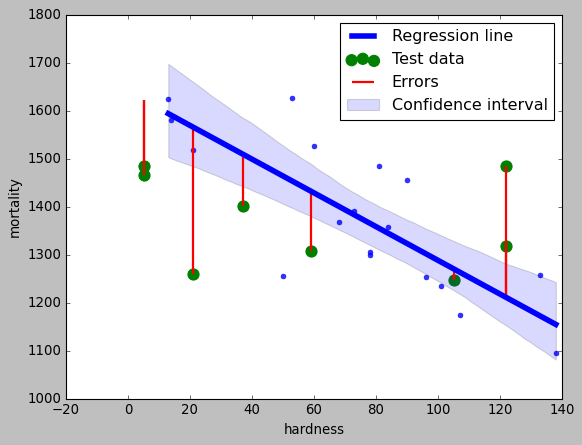

In [227]:
plt.style.use('classic')

plt.scatter(X_test, y_test, color='green',s=100,label='Test data')
plt.vlines(x=X_test, ymin=y_pred, ymax=y_test,color='red',linewidth=2,label='Errors')
ax=sns.regplot(X_train,y_train, line_kws={'label': 'Regression line','linewidth':5})
ax.collections[3].set_label('Confidence interval')
ax.legend()

Коэффициент детерминации показывает, что модель линейной регрессии неприменима.

Text(0.5, 1.0, 'График остаточной ошибки')

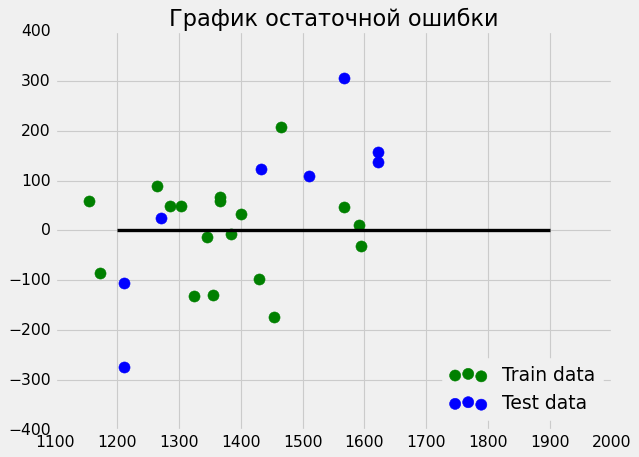

In [228]:
plt.style.use('fivethirtyeight')
plt.scatter(model.predict(X_train),model.predict(X_train)-y_train,color='green',s=100, label='Train data')
plt.scatter(y_pred,y_pred-y_test,color='blue',s=100, label='Test data')
plt.hlines(y=0, xmin=1200, xmax=1900,linewidth=3)
plt.legend(loc='lower right')
plt.title('График остаточной ошибки')

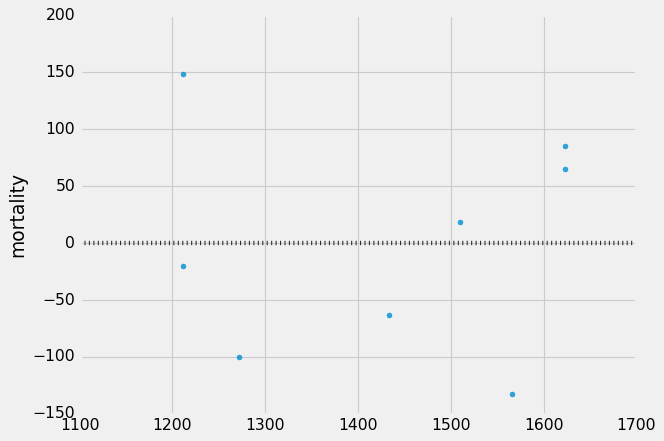

In [229]:
sns.residplot(y_pred,y_test)

График ошибок напоминает функцию 1/x*cos(x), поэтому модель линейной регрессии неприменима, существует сильная обратная нелинейная зависимость.

Если в разрезе регионов модель линейной регрессии применять нельзя, то и в целом по стране тоже, а результаты вычисления случайно совпали.